In [1]:
import os
import cv2
import tensorflow
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm

from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

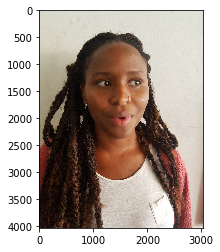

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

base_dir = '/home/tech-iguana/Documents/facial_stuff/tf_facial_model/images/train'

CATEGORIES = ["ashleywangare", "danmatheka", "flavintitus", "harrysuter", "moseskinyua", "richard", "shaphneil", "tracywanjiku", "elviswahome", "floraonyango", "lynnsaidi", "pricechiuri", "royngacha", "tabbynjeri",  "ernestmucheru", "goergemwaura",  "morrisnduvah",  "ramahashim", "safia", "timothymanyonge"]

for category in CATEGORIES:
    path = os.path.join(base_dir, category) #with the iterator named cartegory we are able to loop over files of diffrent people.
    for img in os.listdir(path):  # gets the images of diffrent people store in diffrent folders
        img_array = cv2.imread(os.path.join(path,img))  # convert to array cv.CV_BGR2GRAY
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))  # shows the image in a scale ##, cmap='gray' 
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [3]:
print(img_array)

[[[199 214 216]
  [201 216 218]
  [201 216 218]
  ...
  [217 225 224]
  [212 220 219]
  [215 223 222]]

 [[198 213 215]
  [200 215 217]
  [201 216 218]
  ...
  [216 224 223]
  [214 222 221]
  [213 221 220]]

 [[202 217 219]
  [200 215 217]
  [197 212 214]
  ...
  [217 225 224]
  [216 224 223]
  [212 220 219]]

 ...

 [[ 13  14  42]
  [ 23  24  52]
  [ 25  28  56]
  ...
  [214 226 238]
  [211 225 237]
  [201 215 227]]

 [[ 12  13  41]
  [ 14  15  43]
  [ 27  27  57]
  ...
  [215 227 237]
  [213 225 237]
  [207 219 231]]

 [[ 10  11  39]
  [ 11  12  40]
  [ 15  15  45]
  ...
  [221 233 243]
  [216 228 240]
  [212 224 236]]]


In [4]:
print(img_array.shape)

(4032, 3024, 3)


#### Resizing the images

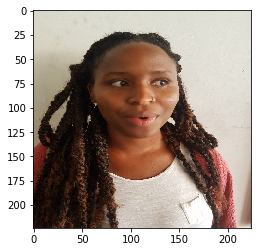

In [5]:
IMG_SIZE = 224

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))  ## cmap='gray'
plt.show()

In [6]:
print(new_array.shape)

(224, 224, 3)


### Creating training data

In [7]:
training_data = []  

def create_training_data():
    for category in CATEGORIES: 

        path = os.path.join(base_dir, category)  # create path to diffrent folders of diffrent people that we want to use for the training set
        class_num = CATEGORIES.index(category)  # get an index for each cartegory
        for img in tqdm(os.listdir(path)):  # iterate over each images of diffrent people in diffrent folders
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array   #,cv2.IMREAD_GRAYSCALE
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()

print(len(training_data))

100%|██████████| 8/8 [00:02<00:00,  3.59it/s]

156


In [8]:
training_data

[[array([[[202, 215, 217],
          [202, 215, 217],
          [202, 215, 217],
          ...,
          [215, 226, 224],
          [217, 228, 226],
          [215, 226, 224]],
  
         [[202, 215, 217],
          [202, 215, 217],
          [202, 215, 217],
          ...,
          [211, 222, 220],
          [213, 224, 222],
          [214, 225, 223]],
  
         [[199, 212, 214],
          [201, 214, 216],
          [204, 217, 219],
          ...,
          [210, 221, 219],
          [211, 222, 220],
          [214, 225, 223]],
  
         ...,
  
         [[ 10,  12,  30],
          [ 10,  16,  36],
          [ 13,  17,  35],
          ...,
          [167, 183, 196],
          [170, 186, 199],
          [145, 159, 182]],
  
         [[ 12,  16,  35],
          [ 19,  24,  45],
          [  7,  12,  29],
          ...,
          [200, 217, 226],
          [194, 213, 221],
          [148, 165, 185]],
  
         [[ 15,  19,  43],
          [ 21,  28,  49],
          [ 10,  17,  32

In [9]:
import random

random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print(sample[1])

14
13
17
18
9
19
2
5
1
7


In [11]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
    

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))


X = np.array(X)     #reshape((333, 50, 50))
y = np.array(y)


In [12]:
X.shape

(156, 224, 224, 3)

In [13]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [14]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

## Transfer Learning

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16

#img_height = img_width = 100 
#channels = 3


#datagen = ImageDataGenerator(rescale=1.0/255)
model = VGG16(weights='imagenet')           #input_shape=(img_width, img_height, channels)

In [16]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [17]:
model.layers.pop()

model.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout

In [19]:
# CREATE A "REAL" MODEL FROM VGG16
# BY COPYING ALL THE LAYERS OF VGG16
new_model = tensorflow.keras.Sequential()
for l in model.layers:
    new_model.add(l)

# LOCK THE TOP CONV LAYERS
#for layer in new_model.layers:
    #layer.trainable = False

In [20]:
new_model.add(Dropout(0.3))
new_model.add(Dense(64, activation='relu'))
new_model.add(Dropout(0.3))
new_model.add(Dense(25, activation='softmax'))
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [21]:
new_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = new_model.fit(X, y, batch_size=32, epochs= 5, validation_split=0.8)

Train on 31 samples, validate on 125 samples
Epoch 1/5
31/31 [==============================] - 68s 2s/sample - loss: 3.2223 - accuracy: 0.0000e+00 - val_loss: 3.2206 - val_accuracy: 0.0320
Epoch 2/5
31/31 [==============================] - 66s 2s/sample - loss: 3.2123 - accuracy: 0.0000e+00 - val_loss: 3.2202 - val_accuracy: 0.0400
Epoch 3/5
31/31 [==============================] - 66s 2s/sample - loss: 3.2124 - accuracy: 0.0968 - val_loss: 3.2200 - val_accuracy: 0.0400
Epoch 4/5
31/31 [==============================] - 65s 2s/sample - loss: 3.2175 - accuracy: 0.0323 - val_loss: 3.2197 - val_accuracy: 0.0400
Epoch 5/5
31/31 [==============================] - 65s 2s/sample - loss: 3.2133 - accuracy: 0.0000e+00 - val_loss: 3.2195 - val_accuracy: 0.0400


In [22]:
plot_loss_accuracy(history)


NameError: name 'plot_loss_accuracy' is not defined

### Loading and veiwing Test Data

In [ ]:
base_directory = '/home/tech-iguana/Documents/facial_stuff/tf_facial_model/images/test'

CATEGORIES = ["ashleywangare", "danielmatheka", "flavintitus", "harrysuter", "kennedythiga",  "moseskinyua", "richardwamalwa", "shaphneil", "tracywanjiku", "collinskorir", "elviswahome", "floraonyango", "johnnzuki", "lynnsaidi", "pricechiuri", "royngacha", "tabbynjeri", "danielwambugu",  "ernestmucheru", "georgemwaura", "josephnyangaresi",  "morrisnduvah",  "ramahashim", "safia", "timothymanyonge"]


for category in CATEGORIES:
    path = os.path.join(base_directory, category) #with the iterator named cartegory we are able to loop over files of diffrent people.
    for img in os.listdir(path):  # gets the images of diffrent people store in diffrent folders
        img_array = cv2.imread(os.path.join(path,img))  # convert to array cv.CV_BGR2GRAY
        plt.imshow(img_array,cv2.COLOR_BGR2RGB)  # shows the image in a scale ##, cmap='gray' 
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

### Reshaping test data

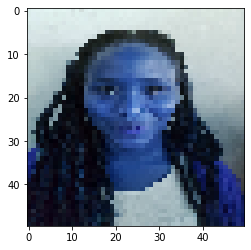

In [35]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)  ## cmap='gray'
plt.show()

In [37]:
print(new_array.shape)

(50, 50, 3)


### Creating test data

In [48]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import numpy as np
import os


base_directory = '/home/tech-iguana/Documents/facial_stuff/tf_facial_model/images/test'

 
CATEGORIES = ["ashleywangare", "danielmatheka", "flavintitus", "harrysuter", "kennedythiga",  "moseskinyua", "richardwamalwa", "shaphneil", "tracywanjiku", "collinskorir", "elviswahome", "floraonyango", "johnnzuki", "lynnsaidi", "pricechiuri", "royngacha", "tabbynjeri", "danielwambugu",  "ernestmucheru", "georgemwaura", "josephnyangaresi",  "morrisnduvah",  "ramahashim", "safia", "timothymanyonge"]
IMG_SIZE = 50

test_data = []  

def create_test_data():
    for category in CATEGORIES: 

        path = os.path.join(base_directory, category)  # create path to diffrent folders of diffrent people that we want to use for the training set
        class_nums = CATEGORIES.index(category)  # get an index for each cartegory
        for img in tqdm(os.listdir(path)):  # iterate over each images of diffrent people in diffrent folders
            try:
                img_in_array = cv2.imread(os.path.join(path,img))  # convert to array   #,cv2.IMREAD_GRAYSCALE
                a_new_array = cv2.resize(img_in_array, (224, 224))  # resize to normalize data size
                test_data.append([a_new_array, class_nums])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_test_data()

print(len(test_data)) 



#prediction = prediction.data.numpy().argmax()  # Our prediction will be the index of the class label with the largest value.
#print labels[prediction]

#features = model.predict(x)
#features

100%|██████████| 6/6 [00:01<00:00,  3.46it/s]

206


In [49]:
type(test_data)

list

In [50]:
X_test = []
y_test = []

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)
    

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))


xx = np.array(X_test)     #.reshape(-1, IMG_SIZE, IMG_SIZE)    #reshape((333, 50, 50))
yy = np.array(y_test)


In [51]:
xx.shape

(206, 224, 224, 3)

In [52]:
type(xx)

numpy.ndarray

In [53]:
score = new_model.evaluate(xx, yy, verbose=0)

In [54]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 3.2138580002831025
Test accuracy: 0.04368932


In [120]:

CATEGORIESS = ["ashleywangare", "danielmatheka", "flavintitus", "harrysuter", "kennedythiga",  "moseskinyua", "richardwamalwa", "shaphneil", "tracywanjiku", "collinskorir", "elviswahome", "floraonyango", "johnnzuki", "lynnsaidi", "pricechiuri", "royngacha", "tabbynjeri", "danielwambugu",  "ernestmucheru", "georgemwaura", "josephnyangaresi",  "morrisnduvah",  "ramahashim", "safia", "timothymanyonge"]


for categorys in CATEGORIESS:
    
    path = os.path.join(base_directory, categorys) #with the iterator named cartegory we are able to loop over files of diffrent people.
    
    
    for imagee in os.listdir(path):  # gets the images of diffrent people store in diffrent folders
        the_img_array = cv2.imread(os.path.join(path,imagee))  # convert to array cv.CV_BGR2GRAY
        aa_new_array = cv2.resize(the_img_array, (50, 50))  # resize to normalize data size

        #print(type(the_img_array))
        #img = load_img(the_img_array, target_size=(50, 50))
        #a = image.img_to_array(the_img_array)
        
        b = np.expand_dims(aa_new_array, axis=0)
        c = preprocess_input(b)
        #c.
        break  # we just want one for now so break
    break  #...and one more!

    

In [25]:
predictions = new_model.predict(c)


NameError: name 'c' is not defined

In [24]:
print(predictions)


NameError: name 'predictions' is not defined

In [23]:
import numpy as np

print(np.argmax(predictions))

NameError: name 'predictions' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


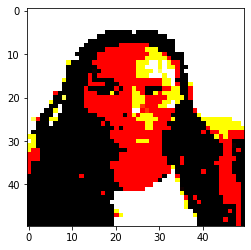

In [128]:
plt.imshow(c[0],cmap=plt.cm.binary)
plt.show()

In [14]:
print("Prediction: {}".format(tf.argmax(features, axis=1)))
print("    Labels: {}".format(y))

Prediction: [[[0 0 0 ... 0 0 0]
  [0 0 6 ... 5 5 0]
  [5 5 0 ... 2 5 0]
  ...
  [0 6 0 ... 2 0 0]
  [0 0 0 ... 2 0 5]
  [0 0 0 ... 2 0 5]]]
    Labels: [2 3 4 4 1 2 1 6 2 4 6 9 9 2 8 9 0 4 0 4 8 5 2 2 3 0 1 2 2 1 8 0 4 0 4 4 8
 8 0 2 0 1 4 0 5 5 4 0 0 0 9 0 4 8 2 1 8 1 1 0 2 0 4 8 3 2 8 4 3 8 2 2 8 2
 2 6 4 4 0 8 1 8 1 1 3 2 8 8 2 8 0 8 3 0 8 8 1 5 1 4 4 8 2 5 1 7 0 8 8 8 5
 1 2 4 1 8 1 8 0 1 0 6 1 8 8 7 6 4 2 1 3 4 0 6 3 8 1 8 3 2 0 8 4 3 8 9 8 3
 2 0 4 4 6 7 4 0 0 2 2 1 8 2 3 3 0 2 8 2 2 1 2 3 4 1 2 2 2 2 4 3 0 1 0 4 9
 5 4 8 4 8 6 5 3 0 2 2 4 8 0 5 8 4 2 4 8 0 3 8 4 8 0 8 8 8 1 0 4 0 0 0 2 4]


In [33]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=50, validation_split=0.8)

Train on 44 samples, validate on 178 samples
Epoch 1/50
44/44 [==============================] - 4s 98ms/sample - loss: 15.0590 - accuracy: 0.0909 - val_loss: 16.0787 - val_accuracy: 0.1180
Epoch 2/50
44/44 [==============================] - 2s 47ms/sample - loss: 13.3409 - accuracy: 0.1136 - val_loss: 16.0787 - val_accuracy: 0.1180
Epoch 3/50
44/44 [==============================] - 2s 54ms/sample - loss: 13.3409 - accuracy: 0.1136 - val_loss: 16.0787 - val_accuracy: 0.1180
Epoch 4/50
44/44 [==============================] - 2s 46ms/sample - loss: 13.3409 - accuracy: 0.1136 - val_loss: 16.0787 - val_accuracy: 0.1180
Epoch 5/50
44/44 [==============================] - 2s 50ms/sample - loss: 13.3409 - accuracy: 0.1136 - val_loss: 16.0787 - val_accuracy: 0.1180
Epoch 6/50
44/44 [==============================] - 2s 47ms/sample - loss: 13.3409 - accuracy: 0.1136 - val_loss: 16.0787 - val_accuracy: 0.1180
Epoch 7/50
44/44 [==============================] - 2s 47ms/sample - loss: 13.3409 - 

KeyboardInterrupt: 

In [29]:
model.output_shape

(None, 3, 3, 512)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 256)       2560      
_________________________________________________________________
activation (Activation)      (None, 48, 48, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 256)       590080    
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0

In [14]:
model.save('attendancefacialmodel')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: attendancefacialmodel/assets


 # Ignore this part

In [49]:
import cv2
import tensorflow as tf

CATEGORIES = ["keith", "martin","keithmartin", "jay", "rodney", "florence", "denzel", "slyvia", "albert", "luidgi"]

def prepare(filepath):
    IMG_SIZE = 50  
    img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [50]:
model = tf.keras.models.load_model("attendancefacialmodel")

In [56]:
base_dir = '/home/tech-iguana/Documents/facial_stuff/tf_facial_model/images/test'

img = os.path.join(base_dir,'martin,2019.5.jpg') 

IMG_SIZE = 50  
img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

prediction = model.predict([prepare('new_array')])

#return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)



#print(prediction)  # will be a list in a list.
#print(CATEGORIES[int(prediction[0][0])]

ValueError: Python inputs incompatible with input_signature:
  inputs: (
    Tensor("IteratorGetNext:0", shape=(None, 50, 50, 1), dtype=uint8))
  input_signature: (
    TensorSpec(shape=(None, None, None, 1), dtype=tf.float32, name=None))